<a href="https://colab.research.google.com/github/chavalvit-k/Covid-19-and-Pneumonia-Classification-with-Deep-Learning/blob/main/Covid_19_and_Pneumonia_Classification_with_Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Covid 19 and Pneumonia Classification with Deep Learning

# Import Libraries

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from math import ceil

from sklearn.metrics import classification_report

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, Dropout, Flatten
from tensorflow.keras.callbacks import EarlyStopping

# Import Dataset

In [4]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
import zipfile
import os

zip_train = zipfile.ZipFile("/content/drive/MyDrive/train.zip", "r")
zip_train.extractall("/tmp")
zip_train.close()

zip_test = zipfile.ZipFile("/content/drive/MyDrive/test.zip", "r")
zip_test.extractall("/tmp")
zip_test.close()

# Preprocess and Load Image Data

In [6]:
training_data_generator = ImageDataGenerator(rescale = 1.0/255, zoom_range = 0.1, rotation_range = 10, width_shift_range = 0.05, height_shift_range = 0.05)
training_iterator = training_data_generator.flow_from_directory(
    "/tmp/train",
    class_mode = "categorical",
    color_mode = "grayscale",
    target_size = (256,256),
    batch_size = 16)

Found 251 images belonging to 3 classes.


In [7]:
testing_data_generator = ImageDataGenerator(rescale = 1.0/255)
testing_iterator = testing_data_generator.flow_from_directory(
    "/tmp/test",
    class_mode = "categorical",
    color_mode = "grayscale",
    target_size = (256,256),
    batch_size = 16,
    shuffle = False)

Found 66 images belonging to 3 classes.


In [8]:
inputs, targets = next(training_iterator)
print("Input shape:", inputs.shape)
print("Target shape:", targets.shape)

Input shape: (16, 256, 256, 1)
Target shape: (16, 3)


In [9]:
testing_iterator.class_indices

{'Covid': 0, 'Normal': 1, 'Pneumonia': 2}

# Build CNN Model

In [15]:
def build_model():
  print("Building the CNN Model...")

  model = Sequential([
      Input(shape = (256,256,1)),
      Conv2D(8, 3, activation = "relu"),
      MaxPooling2D((2,2)),
      Flatten(),
      Dense(3, activation = "softmax")
  ])

  print("Compiling the CNN Model...")
  model.compile(optimizer = "adam", loss = "categorical_crossentropy", metrics = ["accuracy"])

  model.summary()

  return model

In [16]:
model = build_model()

Building the CNN Model...
Compiling the CNN Model...


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)                    │ (None, 254, 254, 8)         │              80 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 127, 127, 8)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 129032)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3)                   │         387,099 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 387,179 (1.48 MB)

 Trainable params: 387,179 (1.48 MB)

 Non-trainable params: 0 (0.00 B)

In [17]:
early_stop = EarlyStopping(monitor = "val_loss", patience = 3)

In [18]:
history = model.fit(
    training_iterator,
    epochs = 20,
    validation_data = testing_iterator,
    callbacks = [early_stop]
)

Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 7s 349ms/step - accuracy: 0.3414 - loss: 9.2340 - val_accuracy: 0.3636 - val_loss: 3.9342
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 10s 326ms/step - accuracy: 0.6316 - loss: 1.7743 - val_accuracy: 0.6970 - val_loss: 1.3719
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 8s 465ms/step - accuracy: 0.8596 - loss: 0.3875 - val_accuracy: 0.7121 - val_loss: 0.8753
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 6s 321ms/step - accuracy: 0.8120 - loss: 0.5309 - val_accuracy: 0.7121 - val_loss: 1.4431
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 9s 528ms/step - accuracy: 0.7791 - loss: 0.5965 - val_accuracy: 0.8182 - val_loss: 0.6129
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 7s 330ms/step - accuracy: 0.8936 - loss: 0.3346 - val_accuracy: 0.7727 - val_loss: 0.8265
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 8s 481ms/step - accuracy: 0.8603 - loss: 0.3634 - val_accuracy: 0.8333 - val_loss: 0.6664
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 6s 326ms/step - accuracy: 0.9298 - loss: 0.2683 - val_accuracy: 0

# Evaluate Model

In [19]:
metrics = pd.DataFrame(history.history)
metrics

,accuracy,loss,val_accuracy,val_loss
0,0.438247,6.881877,0.363636,3.934174
1,0.721116,1.197603,0.696970,1.371915
2,0.852590,0.441299,0.712121,0.875275
3,0.828685,0.520849,0.712121,1.443129
4,0.824701,0.502720,0.818182,0.612888
5,0.884462,0.334308,0.772727,0.826523
6,0.868526,0.379404,0.833333,0.666368
7,0.916335,0.277442,0.818182,0.498987
8,0.924303,0.239896,0.833333,0.490007
9,0.892430,0.233743,0.878788,0.381781


<Axes: >

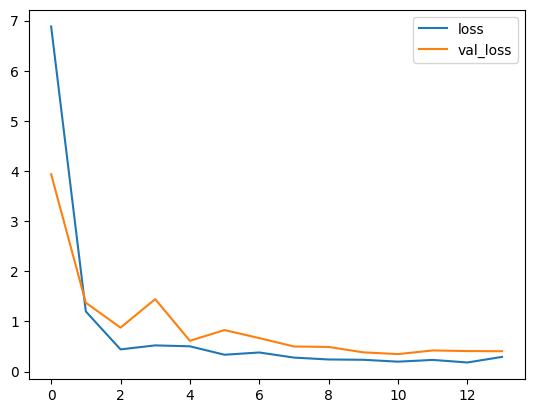

In [20]:
metrics[["loss", "val_loss"]].plot()

<Axes: >

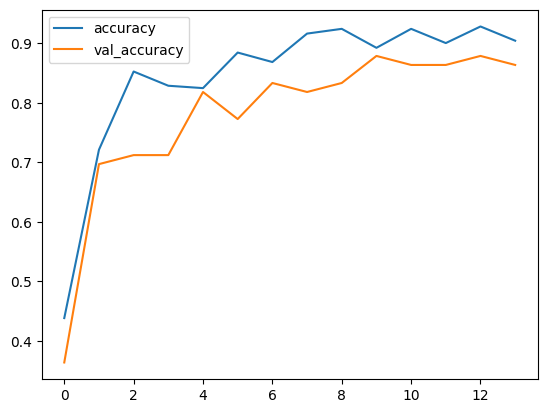

In [21]:
metrics[["accuracy", "val_accuracy"]].plot()

In [22]:
test_loss, test_accuracy = model.evaluate(testing_iterator)
print(f"Test Loss: {test_loss:.2f}, Test Accuracy: {test_accuracy:.2f}")

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 98ms/step - accuracy: 0.8478 - loss: 0.5101 
Test Loss: 0.40, Test Accuracy: 0.86


In [23]:
prediction = model.predict(testing_iterator)
predicted_class = np.argmax(prediction, axis = 1)
true_labels = testing_iterator.classes
class_labels = list(testing_iterator.class_indices.keys())

print(classification_report(true_labels, predicted_class, target_names = class_labels))

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 156ms/step
              precision    recall  f1-score   support

       Covid       1.00      0.85      0.92        26
      Normal       0.76      0.95      0.84        20
   Pneumonia       0.84      0.80      0.82        20

    accuracy                           0.86        66
   macro avg       0.87      0.87      0.86        66
weighted avg       0.88      0.86      0.87        66



# Predict on Samples of Testing Set

In [56]:
sample_data_iterator = testing_data_generator.flow_from_directory(
    "/tmp/test",
    class_mode = "categorical",
    color_mode = "grayscale",
    target_size = (256, 256),
    batch_size = 1,
    shuffle = False
)

Found 66 images belonging to 3 classes.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


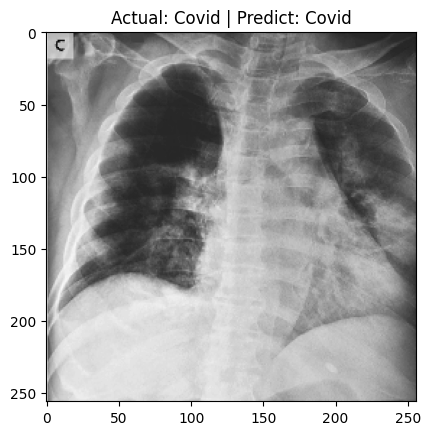

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


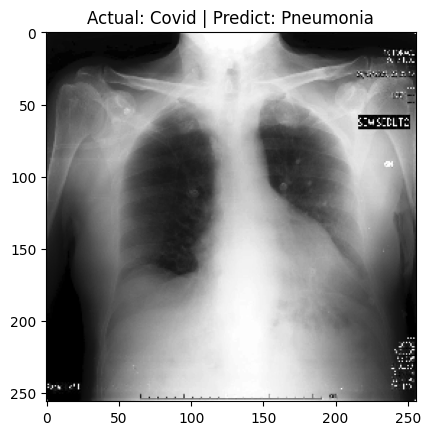

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


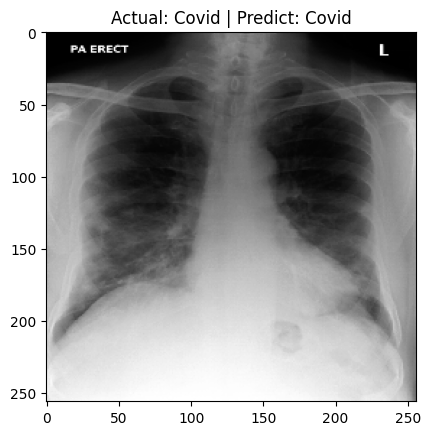

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


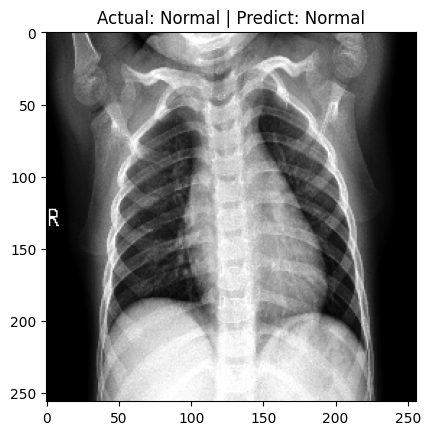

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


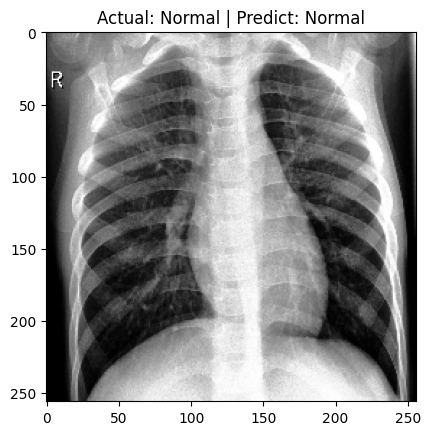

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


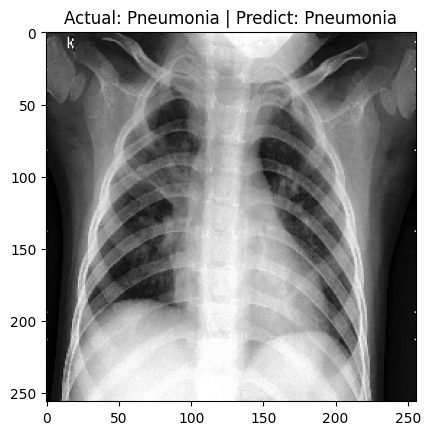

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


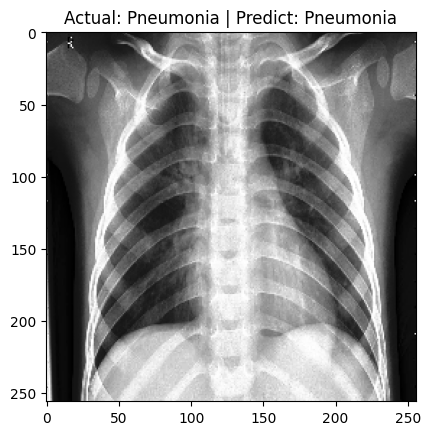

In [57]:
class_names = ["Covid", "Normal", "Pneumonia"]

for i in range(len(sample_data_iterator)):
    x, y_true = next(sample_data_iterator)

    if i % 10 == 0:
      test_prediction = model.predict(x)
      test_predicted_class = np.argmax(test_prediction, axis = 1)

      y_true_class = np.argmax(y_true, axis = 1)

      x = x.reshape(256,256)

      plt.imshow(x, cmap = "gray")
      plt.title(f"Actual: {class_names[y_true_class[0]]} | Predict: {class_names[test_predicted_class[0]]}")
      plt.show()